# Simple Linear Regression

1. Analyze Data

- Feature/Explanatory Variable (x)
- Target/Label/Response Variable (y)

In [1]:
#import modul
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.02f' % x)

df=pd.read_csv('house.csv')
df.head()

,Unnamed: 0,house_area,house_price
0,0,1032.21,1.01
1,1,2329.59,2.52
2,2,2362.68,3.60
3,3,1218.12,2.33
4,4,1323.52,2.09


## Define Feature & Label

In [2]:
#feature
X=df[['house_area']]
X.head()

,house_area
0,1032.21
1,2329.59
2,2362.68
3,1218.12
4,1323.52


In [3]:
#target/label
y=df['house_price']
y.head()

0   1.01
1   2.52
2   3.60
3   2.33
4   2.09
Name: house_price, dtype: float64

In [4]:
import statsmodels.api as sm
#add constant (initial intercept)
X=sm.add_constant(X)
X.head()

,const,house_area
0,1.00,1032.21
1,1.00,2329.59
2,1.00,2362.68
3,1.00,1218.12
4,1.00,1323.52


In [5]:
df[['house_area']].describe()

,house_area
count,150.00
mean,1616.74
std,472.64
min,802.85
25%,1205.43
50%,1562.77
75%,2005.88
max,2472.27


## Modeling

In [6]:
#create/define model
model=sm.OLS(y,X)

#fitting model
reg=model.fit()

#show summary
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            house_price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     664.1
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.40e-56
Time:                        09:14:05   Log-Likelihood:                -42.337
No. Observations:                 150   AIC:                             88.67
Df Residuals:                     148   BIC:                             94.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0742      0.094      0.787      0.432      -0.112       0.261
house_area     0.0014    5.6e-05     25.770      0.000       0.001       0.002
==============================================================================
Omnibus:                        4.383   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                4.011
Skew:                          -0.393   Prob(JB):                        0.135
Kurtosis:                       3.149   Cond. No.                     6.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Interpretation

## $ y= \beta_0 + \beta_1 * {x}_1 $

## **House Price = 0.0742 + 0.0014 \* House Area**

1. R-Squared = 0.818
Artinya model(dengan fitur `house_area`) dapat menjelaskan 81.8% variance dari `house_price`. Sisanya sebesar 18.2% dapat dijelaskan oleh fitur lain.


1. F-test
    - H0 : $\beta_1$ = 0 (house_area tidak berpengaruh signifikan terhadap house_price)
    - Ha : $\beta_1$ $\neq$ 0 (house_area berpengaruh signifikan terhadap house_price)
    - significancy ($\alpha$) : 0.05
    - p_value => Prob(F-Statistics) = 1.40e-56
    - p_value < 0.05  -->reject H0

    `Artinya House Area berpengaruh secara signifikan terhadap House Price`





1. T-test
    1. $\beta_0$ : const(intercept)
        - H0 : $\beta_0$ = 0 (intercept tidak berpengaruh signifikan terhadap house_price/model tidak membutuhkan intercept)
        - Ha : $\beta_0$ $\neq$ 0 (intercept berpengaruh signifikan terhadap house_price/model membutuhkan intercept)
        - significancy ($\alpha$) : 0.05
        - p_value => P>|t| = 0.432
        - p_value > 0.05  --> gagal reject H0

        `Artinya model tidak membutuhkan Intercept`

    1. $\beta_1$ : slope(house_area)
        - H0 : $\beta_1$ = 0 (house_area tidak berpengaruh signifikan terhadap house_price)
        - Ha : $\beta_1$ $\neq$ 0 (house_area berpengaruh signifikan terhadap house_price)
        - significancy ($\alpha$) : 0.05
        - p_value => P>|t| = 0.000
        - p_value < 0.05  --> reject H0

        `house_area berpengaruh signifikan terhadap house_price`



1. Coefficient (**House Price (y) =  0.0014 \* House Area (x)** )
    - $\beta_0$ : 0. Artinya nilai house_price (y) adalah 0 miliar ketika nilai house areanya sebesar 0.
    - $\beta_1$ : 0.0014. Artinya setiap penambahan house_area (x) sebesar 1 $m^2$, maka nilai house_price (y) akan bertambah sebesar 0.0014 miliar. Interpretasi dari coefficient ini hanya berlaku pada rentang house area antara 803 $m^2$ dan 2473 $m^2$.


## Model Visualization

### Tanpa Intercept

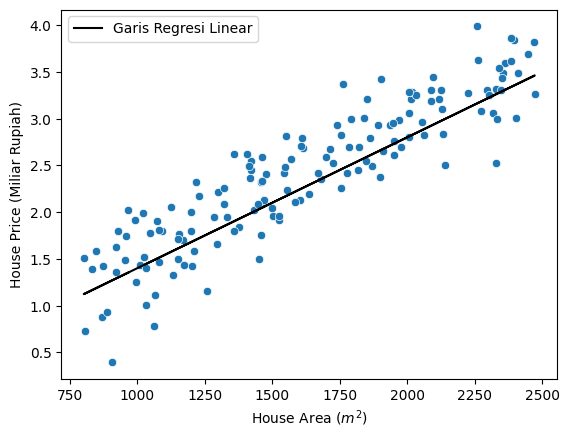

In [7]:
slope=0.0014
sns.scatterplot(data=df,x='house_area',y='house_price')
plt.plot(df['house_area'],slope*df['house_area'],color='black',label='Garis Regresi Linear')
plt.xlabel('House Area ($m^2$)')
plt.ylabel('House Price (Miliar Rupiah)')
plt.legend()
plt.show()

### Dengan Intercept

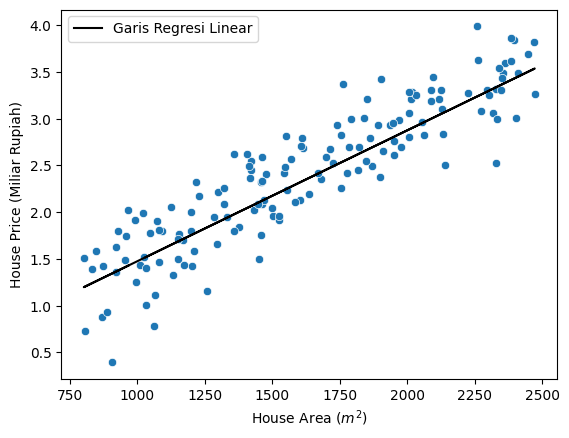

In [8]:
slope=0.0014
intercept=0.0742
sns.scatterplot(data=df,x='house_area',y='house_price')
plt.plot(df['house_area'],intercept+slope*df['house_area'],color='black',label='Garis Regresi Linear')
plt.xlabel('House Area ($m^2$)')
plt.ylabel('House Price (Miliar Rupiah)')
plt.legend()
plt.show()

## Soal 1

Buat model regresi linear sederhana dengan menggunakan OLS, tambahkan konstan,kemudian print summary nya!

In [9]:
import statsmodels.api as sm
#feature
df=pd.read_csv('diamonds.csv')
df.columns
X=df[['carat',  'depth', 'table',
        'x', 'y', 'z']]
# #target/label
# #add constant (initial intercept)
X=sm.add_constant(X)

y=df['price']
# #create/define model
model=sm.OLS(y,X)

# #fitting model
reg=model.fit()

# #show summary
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 5.486e+04
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        09:14:05   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53933   BIC:                         9.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.085e+04    447.562     46.584      0.000       2e+04    2.17e+04
carat       1.069e+04     63.201    169.085      0.000    1.06e+04    1.08e+04
depth       -203.1541      5.504    -36.910      0.000    -213.942    -192.366
table       -102.4457      3.084    -33.216      0.000    -108.491     -96.401
x          -1315.6678     43.070    -30.547      0.000   -1400.086   -1231.250
y             66.3216     25.523      2.599      0.009      16.296     116.347
z             41.6277     44.305      0.940      0.347     -45.210     128.465
==============================================================================
Omnibus:                    14093.399   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373568.966
Skew:                           0.674   Prob(JB):                         0.00
Kurtosis:                      15.822   Cond. No.                     5.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Soal 2 
Buat ulang modelnya dengan menggunakan 3 fitur numerik, 
coba dicek apakah dengan model yang dibuat diperlukan intercept atau tidak?

1. T-test
    1. $\beta_0$ : const(intercept)
        - H0 : $\beta_0$ = 0 (intercept tidak berpengaruh signifikan terhadap house_price/model tidak membutuhkan intercept)
        - Ha : $\beta_0$ $\neq$ 0 (intercept berpengaruh signifikan terhadap house_price/model membutuhkan intercept)
        - significancy ($\alpha$) : 0.05
        - p_value => P>|t| = 0.000
        - p_value < 0.05  --> reject H0

        `Artinya model membutuhkan Intercept`


## Residual/Error

In [10]:
df=pd.read_csv('house.csv')
df.columns
X=df[['house_area']]
# #target/label
# #add constant (initial intercept)
X=sm.add_constant(X)

y=df['house_price']
# #create/define model
model=sm.OLS(y,X)

# #fitting model
reg=model.fit()

# #show summary
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            house_price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     664.1
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.40e-56
Time:                        09:14:05   Log-Likelihood:                -42.337
No. Observations:                 150   AIC:                             88.67
Df Residuals:                     148   BIC:                             94.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0742      0.094      0.787      0.432      -0.112       0.261
house_area     0.0014    5.6e-05     25.770      0.000       0.001       0.002
==============================================================================
Omnibus:                        4.383   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                4.011
Skew:                          -0.393   Prob(JB):                        0.135
Kurtosis:                       3.149   Cond. No.                     6.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## y prediction

In [11]:
y_pred=reg.predict(X)

df['prediction_price']=y_pred
df

,Unnamed: 0,house_area,house_price,prediction_price
0,0,1032.21,1.01,1.56
1,1,2329.59,2.52,3.44
2,2,2362.68,3.60,3.48
3,3,1218.12,2.33,1.83
4,4,1323.52,2.09,1.98
...,...,...,...,...
145,145,849.30,1.58,1.30
146,146,2382.69,3.86,3.51
147,147,1031.74,1.40,1.56
148,148,1322.07,2.26,1.98


In [12]:
df

,Unnamed: 0,house_area,house_price,prediction_price
0,0,1032.21,1.01,1.56
1,1,2329.59,2.52,3.44
2,2,2362.68,3.60,3.48
3,3,1218.12,2.33,1.83
4,4,1323.52,2.09,1.98
...,...,...,...,...
145,145,849.30,1.58,1.30
146,146,2382.69,3.86,3.51
147,147,1031.74,1.40,1.56
148,148,1322.07,2.26,1.98


### Error/Residual

In [13]:
df['residual']=df['house_price']-df['prediction_price']

<Axes: xlabel='residual', ylabel='Count'>

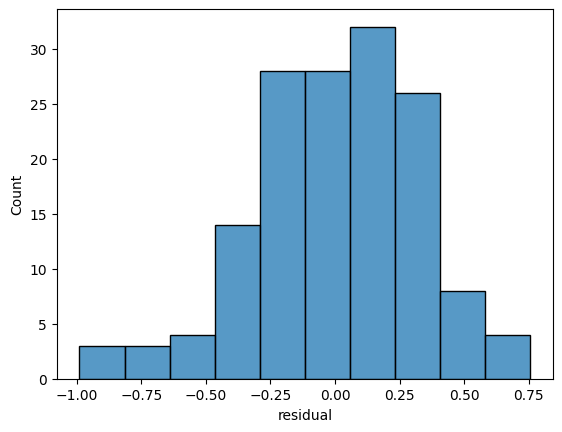

In [14]:
sns.histplot(df['residual'])

### Squared Error

In [15]:
df['squared_error']=(df['house_price']-df['prediction_price'])**2

### Mean Squared Error (MSE)

In [16]:
MSE=df['squared_error'].mean()
print(f'Nilai MSE dari model tersebut adalah {MSE}')

Nilai MSE dari model tersebut adalah 0.10296335486921042


### Root Mean Squared Error (RMSE)

In [17]:
RMSE=(df['squared_error'].mean())**0.5
print(f'Nilai RMSE dari model tersebut adalah {RMSE}')

Nilai RMSE dari model tersebut adalah 0.32087903463643497


In [18]:
### SST(sum squared total) & SSE 
df['squared_total']=(df['house_price']-df['house_price'].mean())**2
df['squared_error']=(df['house_price']-df['prediction_price'])**2
SST=df['squared_total'].sum()
SSE=df['squared_error'].sum()

### R-Squared

In [19]:
R2=1-(SSE/SST)
print(f'Nilai R-Squared dari model tersebut adalah {R2}')

Nilai R-Squared dari model tersebut adalah 0.8177599399384174


## Exercise Data Tips


1. Analyze Data

- Feature/Explanatory Variable (x)
- Target/Label/Response Variable (y)

In [20]:

df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Define Feature & Label

In [21]:
#feature
X=df[['total_bill']]
X.head()

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59


In [23]:
#target/label
y=df['tip']
y.head()

0   1.01
1   1.66
2   3.50
3   3.31
4   3.61
Name: tip, dtype: float64

In [24]:
import statsmodels.api as sm
#add constant (initial intercept)
X=sm.add_constant(X)
X.head()

,const,total_bill
0,1.00,16.99
1,1.00,10.34
2,1.00,21.01
3,1.00,23.68
4,1.00,24.59


In [25]:
df[['total_bill']].describe()

,total_bill
count,244.00
mean,19.79
std,8.90
min,3.07
25%,13.35
50%,17.80
75%,24.13
max,50.81


## Modeling

In [26]:
#create/define model
model=sm.OLS(y,X)

#fitting model
reg=model.fit()

#show summary
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 06 May 2024   Prob (F-statistic):           6.69e-34
Time:                        09:16:26   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Interpretation

## $ y= \beta_0 + \beta_1 * {x}_1 $

## **Tip = 0.9203 + 0.1050 \* Total Bill**

1. R-Squared = 0.457
Artinya model(dengan fitur `total_bill`) dapat menjelaskan 45.7% variance dari `tip`. Sisanya sebesar 54.3% dapat dijelaskan oleh fitur lain.


1. F-test
    - H0 : $\beta_1$ = 0 (total_bill tidak berpengaruh signifikan terhadap tip)
    - Ha : $\beta_1$ $\neq$ 0 (total_bill berpengaruh signifikan terhadap tip)
    - significancy ($\alpha$) : 0.05
    - p_value => Prob(F-Statistics) = 6.69e-34
    - p_value < 0.05  -->reject H0

    `Artinya total_bill berpengaruh signifikan terhadap tip`





1. T-test
    1. $\beta_0$ : const(intercept)
        - H0 : $\beta_0$ = 0 (intercept tidak berpengaruh signifikan terhadap house_price/model tidak membutuhkan intercept)
        - Ha : $\beta_0$ $\neq$ 0 (intercept berpengaruh signifikan terhadap house_price/model membutuhkan intercept)
        - significancy ($\alpha$) : 0.05
        - p_value => P>|t| = 0.000
        - p_value < 0.05  --> reject H0

        `Artinya model membutuhkan Intercept`

    1. $\beta_1$ : slope(house_area)
        - H0 : $\beta_1$ = 0 (total_bill tidak berpengaruh signifikan terhadap tip)
        - Ha : $\beta_1$ $\neq$ 0 (total_bill berpengaruh signifikan terhadap tip)
        - significancy ($\alpha$) : 0.05
        - p_value => P>|t| = 0.000
        - p_value < 0.05  --> reject H0

        `total_bill berpengaruh signifikan terhadap tip`



1. Coefficient (**Tip (y) = 0.9203 + 0.1050 \* Total Bill (x)** )
    - $\beta_0$ : 0.9203. Artinya nilai tip (y) adalah 0.9203 dollar ketika nilai total_bill sebesar 0.
    - $\beta_1$ : 0.1050. Artinya setiap penambahan total_bill (x) sebesar 1 Dollar, maka nilai Tip (y) akan bertambah sebesar 0.1050 Dollar. Interpretasi dari coefficient ini hanya berlaku pada rentang total bill antara 3 Dollar dan 51 Dollar.


## Model Visualization

### Tanpa Intercept

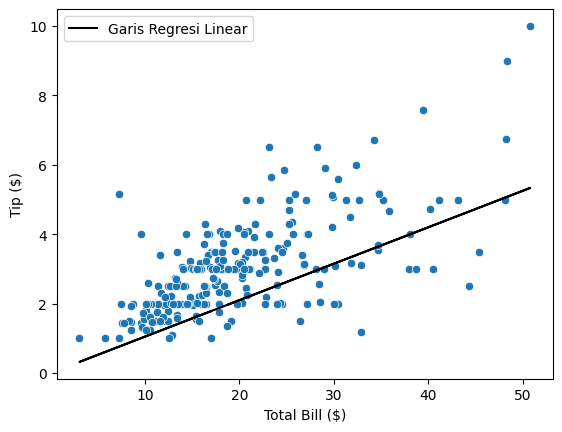

In [27]:
slope=0.1050
sns.scatterplot(data=df,x='total_bill',y='tip')
plt.plot(df['total_bill'],slope*df['total_bill'],color='black',label='Garis Regresi Linear')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.legend()
plt.show()

### Dengan Intercept

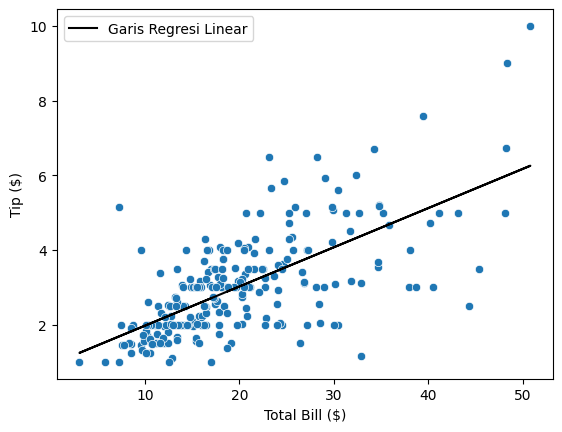

In [28]:
slope=0.1050
intercept=0.9203
sns.scatterplot(data=df,x='total_bill',y='tip')
plt.plot(df['total_bill'],intercept+slope*df['total_bill'],color='black',label='Garis Regresi Linear')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.legend()
plt.show()